In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [149]:
# Read raw data

df = pd.read_csv('./dataset/stackoverflow_data/survey_results_public.csv')
df['MajorUndergrad'].value_counts()

Computer science or software engineering                        21409
Computer engineering or electrical/electronics engineering       4364
Computer programming or Web development                          3883
Information technology, networking, or system administration     2140
A natural science                                                1865
A non-computer-focused engineering discipline                    1789
Mathematics or statistics                                        1648
Something else                                                   1060
A humanities discipline                                           901
A business discipline                                             900
Management information systems                                    654
Fine arts or performing arts                                      646
A social science                                                  633
I never declared a major                                          592
Psychology          

In [150]:
# Drop the NaN value and calculate the percentage of the unique values for each column

def missingValue(col_names, df):

    df = df.dropna(subset = [col_names])
    value_perc = df[col_names].value_counts() / df.shape[0]
    
    return value_perc
    

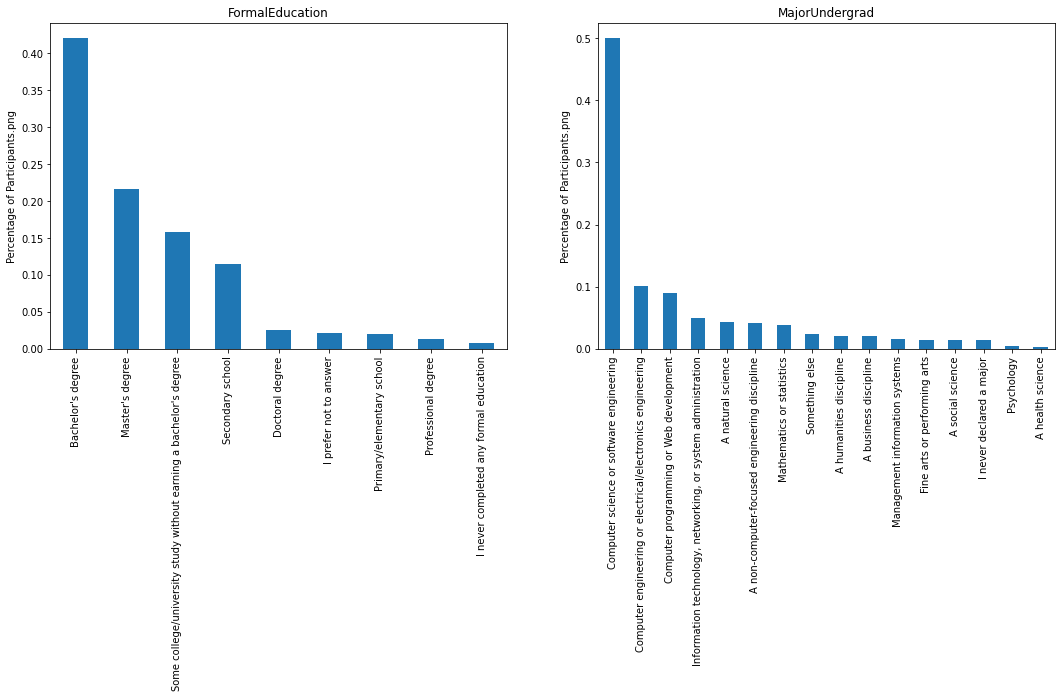

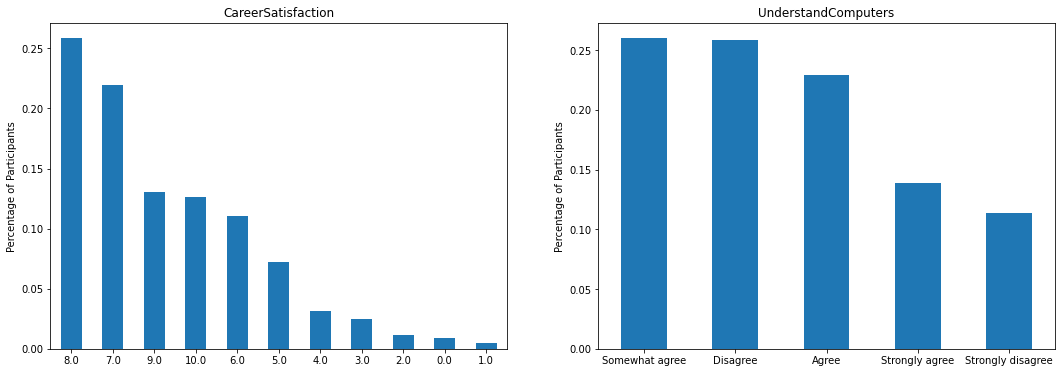

In [162]:
# Visualize the results of the background of the participants in terms of formal eduction, major, career satisfaction, and computer understanding
working_df = df[['FormalEducation', 'MajorUndergrad', 'CareerSatisfaction', 'UnderstandComputers']]
col_names = working_df.columns
fig1, axs1 = plt.subplots(1, 2, figsize = (18, 6))

# plot background
for names, ax in zip(col_names[0:2], axs1.ravel()):
    value_perc = missingValue(names, working_df)
    value_perc.plot.bar(x = 'index', rot = 90, ax = ax)

    # chart formatting
    ax.set_title(names)
    ax.set_ylabel("Percentage of Participants.png")

fig1.patch.set_facecolor('white')
plt.savefig('results/background1.png', bbox_inches='tight')

# plot program_experience
fig2, axs2 = plt.subplots(1, 2, figsize = (18, 6))
for names, ax in zip(col_names[2:4], axs2.ravel()):
    value_perc = missingValue(names, working_df)
    value_perc.plot.bar(x = 'index', rot = 0, ax = ax)

    # chart formatting
    ax.set_title(names)
    ax.set_ylabel("Percentage of Participants")

fig2.patch.set_facecolor('white')
plt.savefig('results/background2.png')